# GLWT MNIST


* Atividade PEL219 - GLWT MNIST - Gabriel Melo. Matrícula: 125.304-6

In [2]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

2025-11-23 15:48:51.991413: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-23 15:48:52.039744: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-23 15:48:53.168374: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
y_train = to_categorical(y_train)

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000,))

In [6]:
def train_glwt(model: Sequential, X: np.array, Y: np.array, optimizer="adam", loss="categorical_crossentropy", metrics="categorical_accuracy", _epochs=10, _validation_split=.1, _callbacks=None):
    histories = []
    
    for i in range(1, len(model.layers)):
        for layer in model.layers[:i]:
            layer.trainable = False
        for layer in model.layers[i:]:
            layer.trainable = True

        model.compile(optimizer, loss, metrics=[metrics])
        
        if not _callbacks:
            histories.append(model.fit(x=x_train, y=y_train, epochs=_epochs, validation_split=_validation_split))
        else:
            histories.append(model.fit(x=x_train, y=y_train, epochs=_epochs, validation_split=_validation_split, callbacks=_callbacks))
        

    return histories

In [29]:
model = Sequential() 
model.add(Conv2D(64, (5, 5), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="softmax"))  # digit numbers

model.compile()


/home/melo/coding/machine-learning/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

hist = train_glwt(model, x_train, y_train, _callbacks=[es])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.9038 - loss: 0.3468 - val_categorical_accuracy: 0.9663 - val_loss: 0.1084
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - categorical_accuracy: 0.9735 - loss: 0.0904 - val_categorical_accuracy: 0.9828 - val_loss: 0.0670
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - categorical_accuracy: 0.9809 - loss: 0.0656 - val_categorical_accuracy: 0.9843 - val_loss: 0.0565
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - categorical_accuracy: 0.9834 - loss: 0.0545 - val_categorical_accuracy: 0.9848 - val_loss: 0.0501
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - categorical_accuracy: 0.9859 - loss: 0.0463 - val_categorical_accuracy: 0.9872 - val_loss: 0.0473
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - categorical_accuracy: 0.9874 - loss: 0.0403 - val_categorical_accuracy: 0.9883 - val_loss: 0.0403
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - categorical_accu

## Testing

In [31]:
results = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [32]:
results_class = np.argmax(results, axis=1)

In [33]:
accuracy_score(results_class, y_test), precision_score(results_class, y_test, average="weighted"), recall_score(results_class, y_test, average="weighted"), f1_score(results_class, y_test, average="weighted")

(0.9911, 0.9911203518928025, 0.9911, 0.9911034643399369)

In [34]:
print(classification_report(y_test, results_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Axes: >

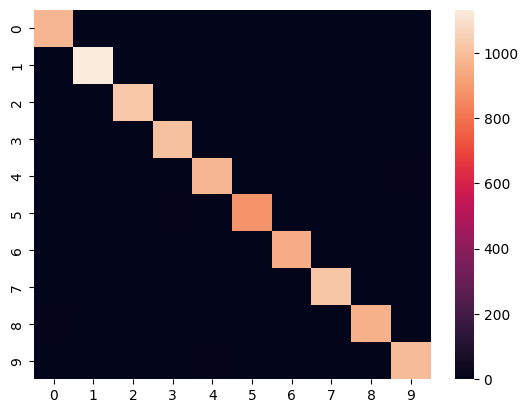

In [35]:
sns.heatmap(confusion_matrix(y_test, results_class))

## Training data (Displaying only the last layer)

In [36]:
hist = [h.history for h in hist]

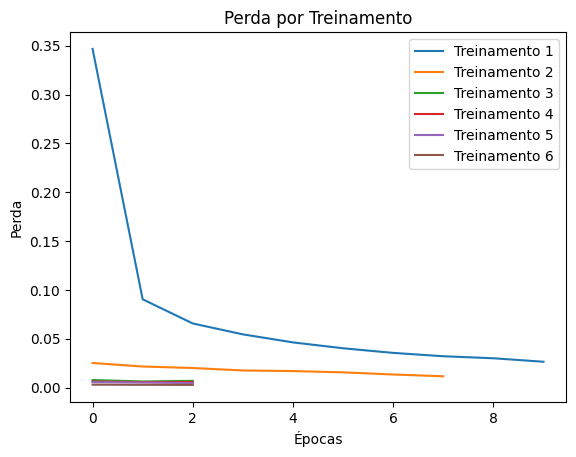

In [38]:
fig = plt.subplot(1,1,1)
for i, h in enumerate(hist):
    fig.plot(h['loss'], label=f'Treinamento {i+1}')
        
plt.title("Perda por Treinamento")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()

plt.show()